# Portugal Bank Marketing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("C:/Users/soppoju narender/Desktop/FS-DataScience/ML_module/Assignment/1693917003388_bank.csv",sep=';')

# EDA

In [3]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
data.shape

(41188, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### here we don't have any null or missing values that seems good for analysis

# y has the client subscribed a term deposit? (binary: "yes","no")

# y is our target variable we need to find that a person is subscribed or not
    

In [6]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
#renaming the target variable (y) name into  subscribe
data.rename(columns={'y':"Subscribe"},inplace=True)

In [8]:
data['Subscribe'].value_counts()

no     36548
yes     4640
Name: Subscribe, dtype: int64

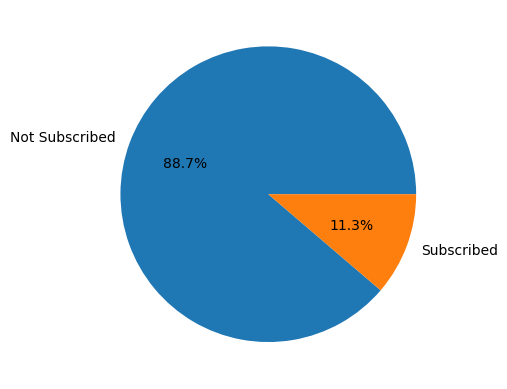

In [9]:
plt.pie(data['Subscribe'].value_counts(),labels=['Not Subscribed','Subscribed'],autopct="%1.1f%%")
plt.show()

# target value analysis

it seems majority people are not subscribed almost 89% of people are not subscribed
  only 11% people are  subscribed

In [10]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Subscribe
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [11]:
#droping 
data.drop(['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','campaign', 'pdays', 'previous',],axis=1,inplace=True)

## Dropping Columns

### 'emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','campaign', 'pdays', 'previous'
 #### these columns are dropped because of these are undesired columns that the data is not related to our target so we dropped these columns by understanding  problem statement

In [12]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,poutcome,Subscribe
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,nonexistent,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,nonexistent,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,nonexistent,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,nonexistent,no


In [13]:
num_data=data.select_dtypes(include=np.number)
num_data

,age,duration
0,56,261
1,57,149
2,37,226
3,40,151
4,56,307
...,...,...
41183,73,334
41184,46,383
41185,56,189
41186,44,442


    These are the columns contains numerical data and it seems discrete

<AxesSubplot:xlabel='duration', ylabel='Density'>

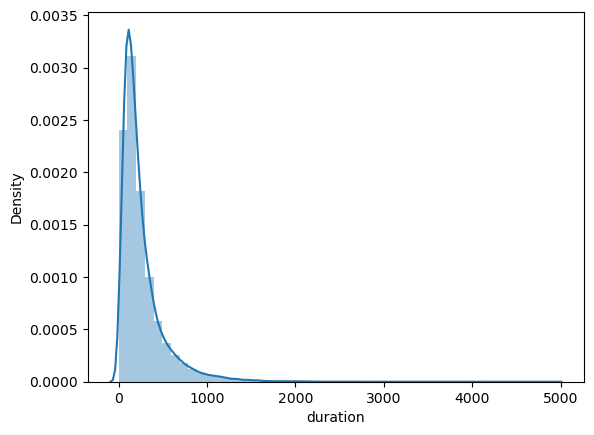

In [14]:
sns.distplot(data['duration'])

   ### the duration is maximum time phone call is morethan 4500 seconds but most of the clients are wish to speak approxmately 500 seconds

In [15]:
cat_data=data.select_dtypes(include=object)
cat_data.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'Subscribe'],
      dtype='object')

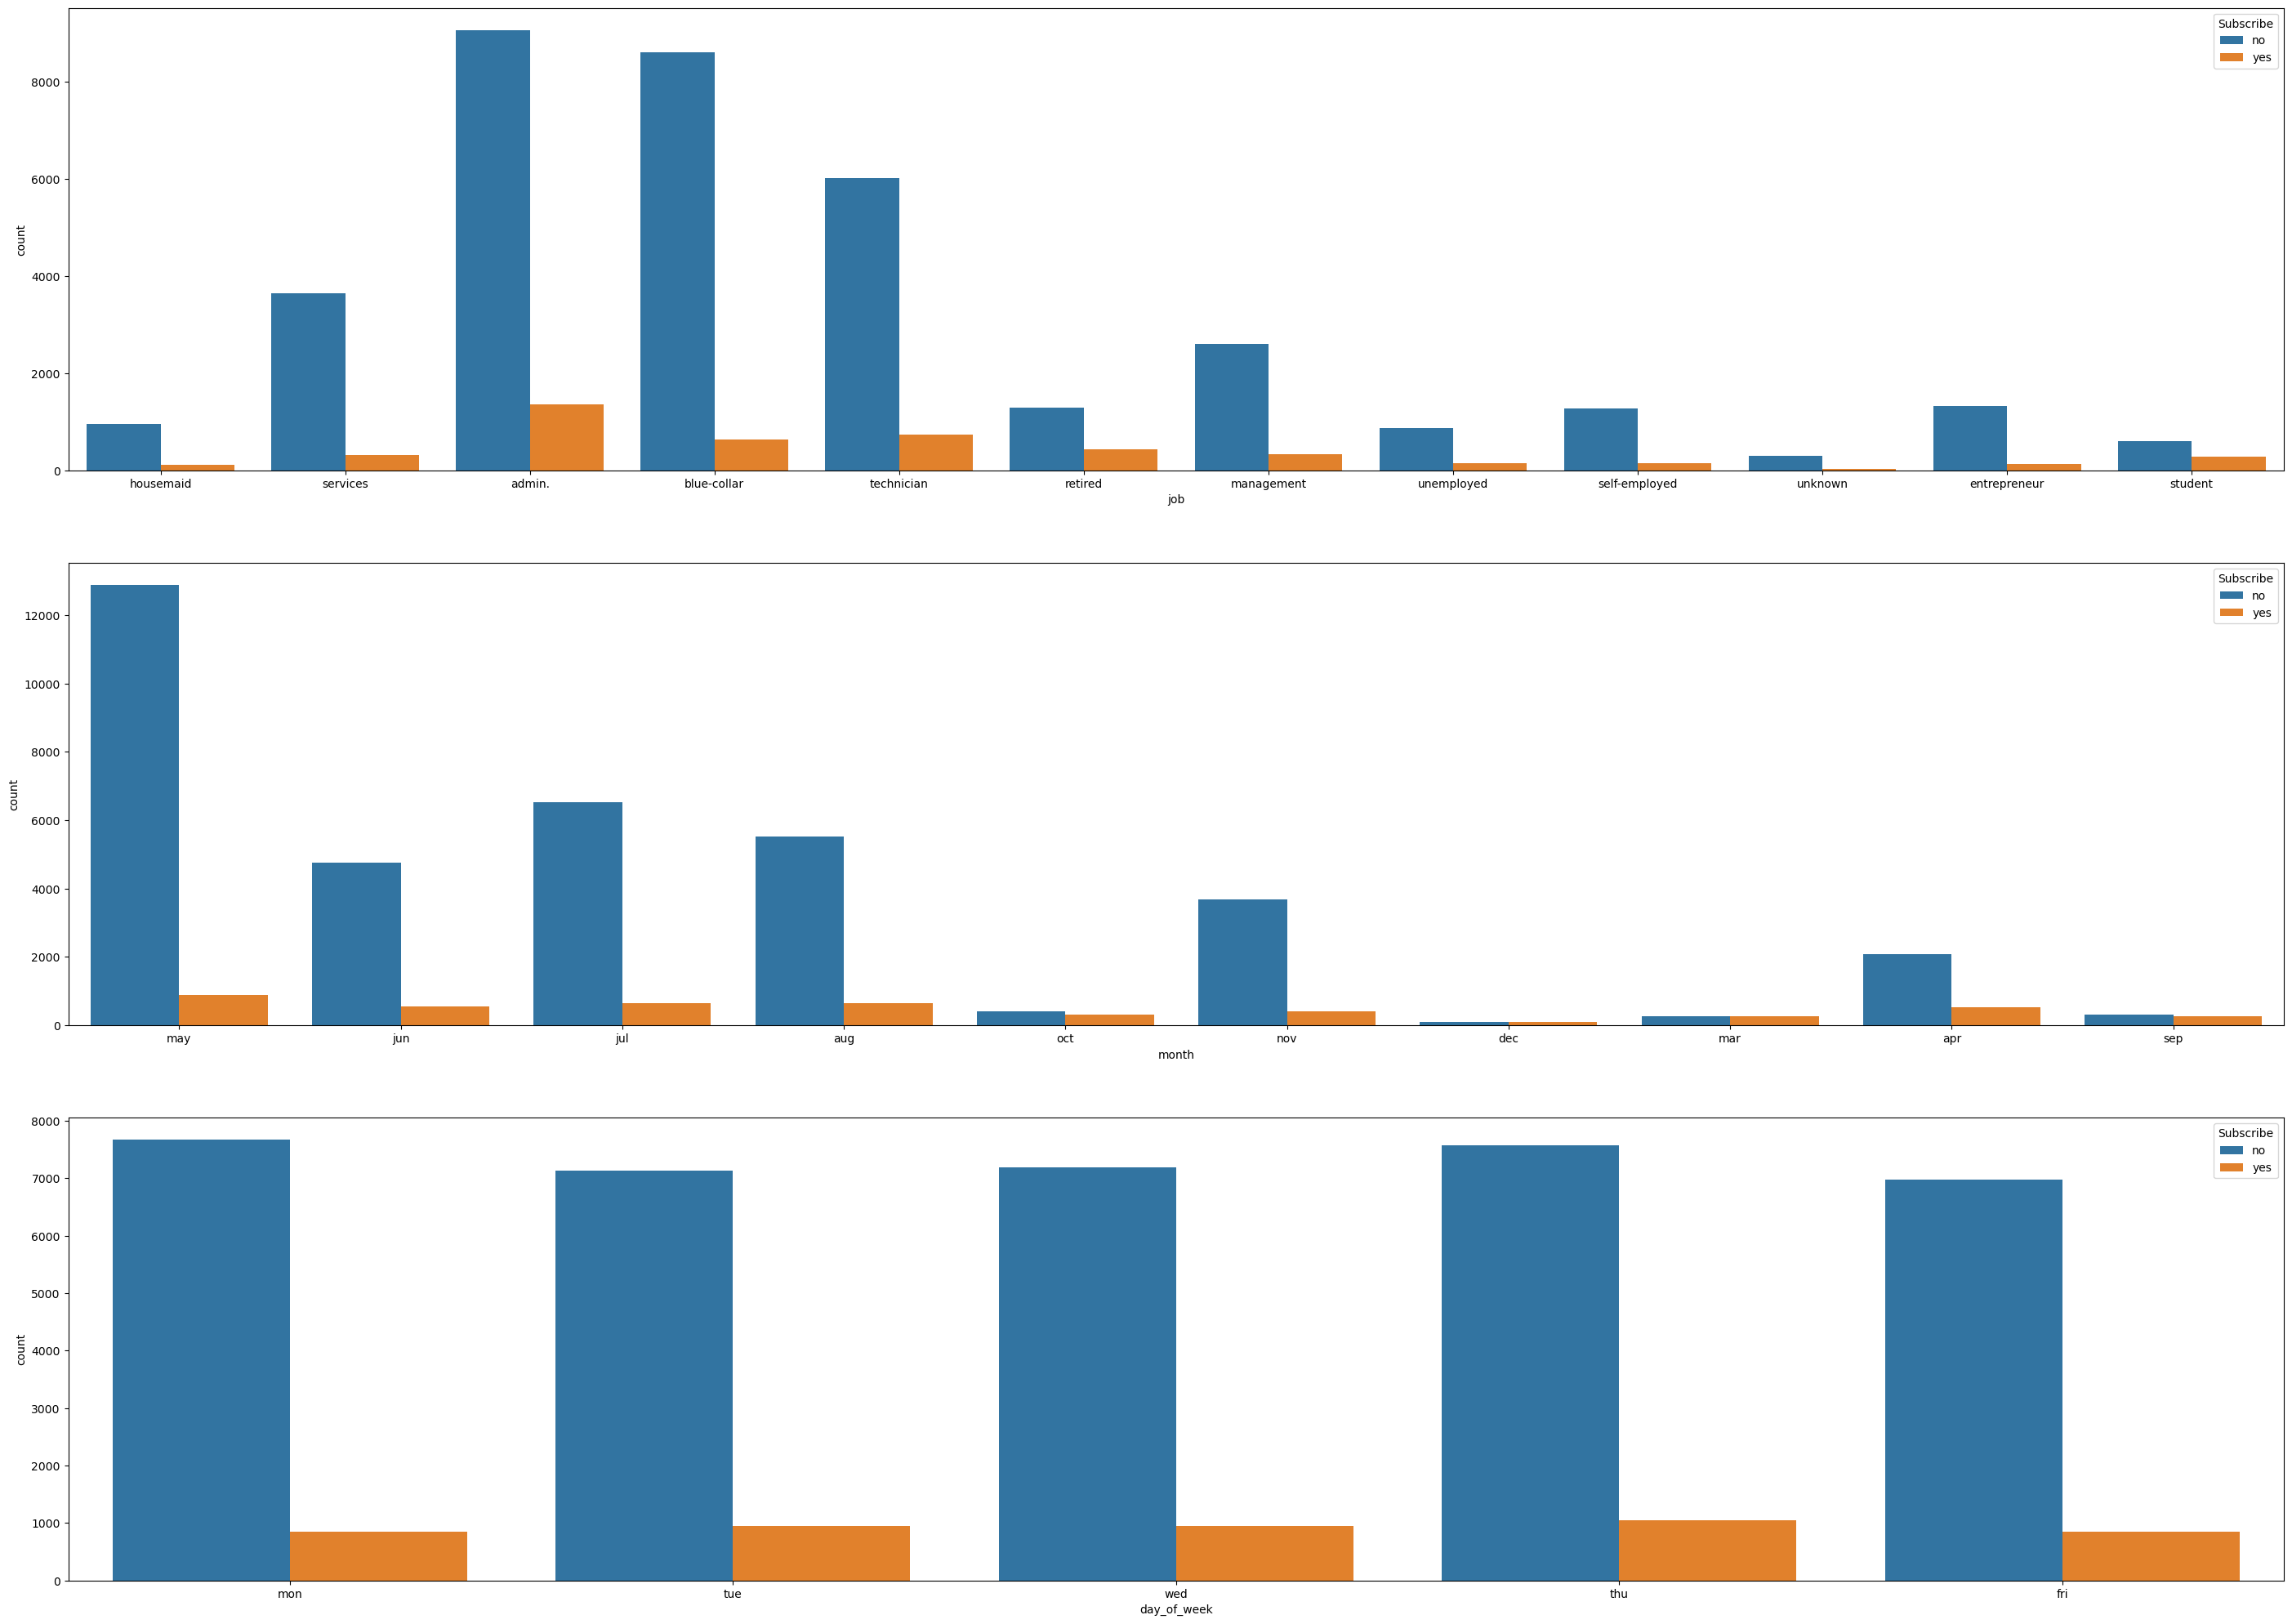

In [16]:
fig, ax = plt.subplots(3, 1, figsize = (35, 25))

cols =['job','month', 'day_of_week']
for i ,val in enumerate(cols):
    sns.countplot(x = val,hue='Subscribe', data = data, ax = ax[i])

# insights
 
 job:-> 1.it seems students are highly like to subscribe based on there count they are highly showing intrest to subscribe
      ->2.admin, blue coller, technician these are people who are highly unlike to subscribe
      
         Suggestion: in order to get more subscribers focus on students and retired
         
 month:->1:people in december and sep and march,oct are highly like to subscribe
         2:in month may people are unlike to subscribe
 
 day_of_week:-> it seems every working day is good for marketing(it seems months are matter not days)

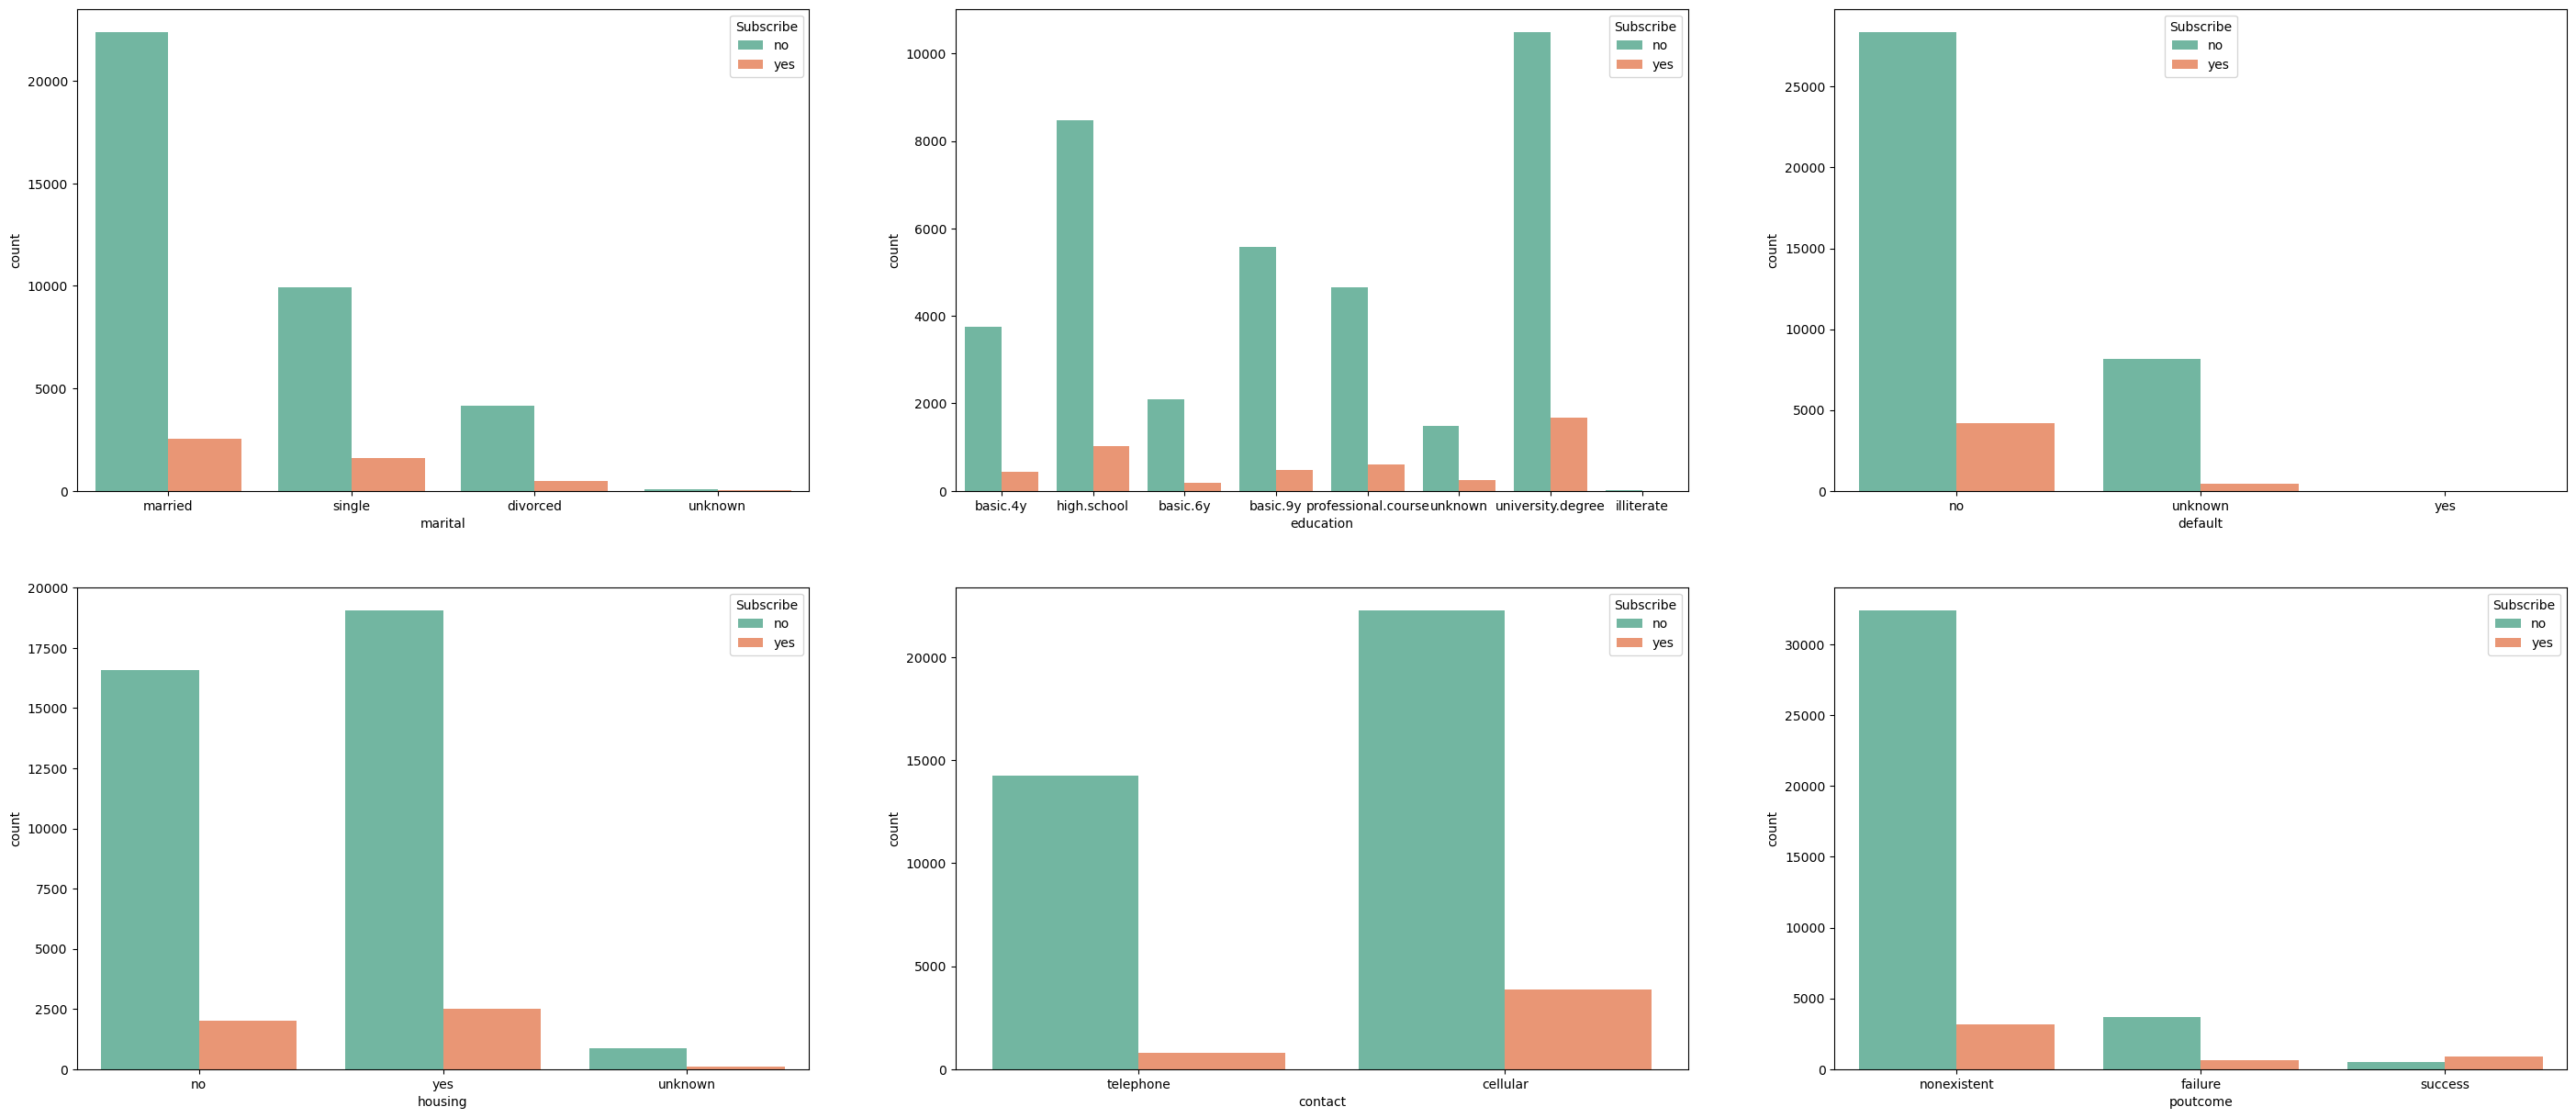

In [17]:
fig, ax = plt.subplots(2, 3, figsize=(35, 15))

sns.countplot(x='marital', hue='Subscribe', data=data, palette='Set2', ax=ax[0][0])
sns.countplot(x='education', hue='Subscribe', data=data, palette='Set2', ax=ax[0][1])
sns.countplot(x= 'default', hue='Subscribe', data=data, palette='Set2', ax=ax[0][2])
sns.countplot(x='housing', hue='Subscribe', data=data, palette='Set2', ax=ax[1][0])
sns.countplot(x='contact', hue='Subscribe', data=data, palette='Set2', ax=ax[1][1])
sns.countplot(x='poutcome', hue='Subscribe', data=data, palette='Set2', ax=ax[1][2])
plt.show()

# insights-2

martial->1:married people are more unlikely to subscribe,
           whereas singles and divorsed are more likely to subscribe when compared to married.
           
           
house-> people who have houseloan i doesn't matter to take subscription,
           but slightly people who don't have house loan they can subscribed more...
           
 
contact-> people who are using cellular high chances to subscribe,
          > telephone users are high chances unlike to subscribe ..
          


poutcome->:(outcome of the previous marketing campaign)
           ->from the previous campaign the successrate is high that means people are 
           who said i will subscribe they are subscribed.

          
          
           
           
           
           
    

# Feature Engineering

In [18]:
cat_data.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'Subscribe'],
      dtype='object')

## Label Ecoding

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'Subscribe']

for i in cols:
    data[i]=le.fit_transform(data[i])

In [20]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,poutcome,Subscribe
0,56,3,1,0,0,0,0,1,6,1,261,1,0
1,57,7,1,3,1,0,0,1,6,1,149,1,0
2,37,7,1,3,0,2,0,1,6,1,226,1,0
3,40,0,1,1,0,0,0,1,6,1,151,1,0
4,56,7,1,3,0,0,2,1,6,1,307,1,0


## Outlier detection

<AxesSubplot:xlabel='duration'>

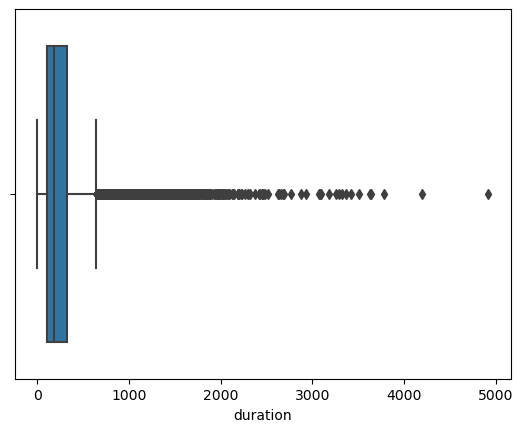

In [21]:
sns.boxplot(data['duration'])

###### we have outliers in duration , removed outliers using IQR technique

In [22]:
Q1=data['duration'].quantile(0.25)
Q3=data['duration'].quantile(0.75)
IQR=Q3-Q1
IQR

217.0

In [23]:
data=data[(data["duration"]>=Q1-1.5*IQR)&(data["duration"]<=Q3+1.5*IQR)]

<AxesSubplot:xlabel='duration'>

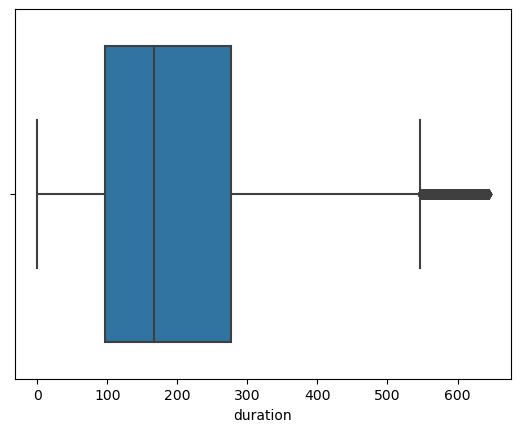

In [24]:
sns.boxplot(data['duration'])

# Feature Selection

#### here iam using chi square technique to get all dependent and independent features

In [25]:
from sklearn.feature_selection import chi2

In [26]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'poutcome', 'Subscribe'],
      dtype='object')

In [27]:
x1=data[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'poutcome']]
y1=data['Subscribe']


In [28]:
score=chi2(x1,y1)
score

(array([1.96195563e+02, 1.26389052e+02, 3.09789797e+01, 2.12863044e+02,
        3.85705596e+02, 7.60700636e+00, 5.31770201e+00, 5.55612483e+02,
        1.36224240e-03, 7.64306145e+00, 2.76216420e+05, 1.16355450e+02]),
 array([1.41281133e-044, 2.52743929e-029, 2.60838139e-008, 3.26024590e-048,
        7.12504095e-086, 5.81419323e-003, 2.11098326e-002, 7.56934339e-123,
        9.70557908e-001, 5.69911095e-003, 0.00000000e+000, 3.97307117e-027]))

In [29]:
p_val=pd.Series(score[1],index=x1.columns)
p_val

age             1.412811e-44
job             2.527439e-29
marital         2.608381e-08
education       3.260246e-48
default         7.125041e-86
housing         5.814193e-03
loan            2.110983e-02
contact        7.569343e-123
month           9.705579e-01
day_of_week     5.699111e-03
duration        0.000000e+00
poutcome        3.973071e-27
dtype: float64

In [30]:
indep=[]
for x in p_val.index:
    if p_val[x]<=0.5:
        print(x,"\n-->Reject Null Hypo")
    else:
        print(x,"\n-->Accept Null Hypo")
        indep.append(x)
print(indep)

age 
-->Reject Null Hypo
job 
-->Reject Null Hypo
marital 
-->Reject Null Hypo
education 
-->Reject Null Hypo
default 
-->Reject Null Hypo
housing 
-->Reject Null Hypo
loan 
-->Reject Null Hypo
contact 
-->Reject Null Hypo
month 
-->Accept Null Hypo
day_of_week 
-->Reject Null Hypo
duration 
-->Reject Null Hypo
poutcome 
-->Reject Null Hypo
['month']


### Droping independent features

In [31]:
data.drop(indep,axis=1,inplace=True)

In [32]:
data.head()

,age,job,marital,education,default,housing,loan,contact,day_of_week,duration,poutcome,Subscribe
0,56,3,1,0,0,0,0,1,1,261,1,0
1,57,7,1,3,1,0,0,1,1,149,1,0
2,37,7,1,3,0,2,0,1,1,226,1,0
3,40,0,1,1,0,0,0,1,1,151,1,0
4,56,7,1,3,0,0,2,1,1,307,1,0


## Building Model

In [33]:
X=data.drop('Subscribe',axis=1)
y=data['Subscribe']

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=30)


In [35]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((28668, 11), (9557, 11), (28668,), (9557,))

### Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [37]:
lg.fit(X_train,y_train)

LogisticRegression()

In [38]:
lg_pred=lg.predict(X_test)

In [39]:
from sklearn.metrics import roc_auc_score, classification_report

In [40]:
print("auc Score: ", roc_auc_score(y_test,lg_pred))
print(classification_report(y_test,lg_pred))

auc Score:  0.5418894110459543
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      8802
           1       0.51      0.09      0.15       755

    accuracy                           0.92      9557
   macro avg       0.72      0.54      0.56      9557
weighted avg       0.89      0.92      0.90      9557



## Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [42]:
model.fit(X_train,y_train)

GaussianNB()

In [43]:
nv_pred = model.predict(X_test)

In [44]:
print("auc Score: ", roc_auc_score(y_test,nv_pred))
print(classification_report(y_test, nv_pred))

auc Score:  0.7076760850559249
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      8802
           1       0.37      0.48      0.42       755

    accuracy                           0.90      9557
   macro avg       0.66      0.71      0.68      9557
weighted avg       0.91      0.90      0.90      9557



## Decision Tree with passing Parameters

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth =24, min_samples_leaf= 1, min_samples_split= 2, splitter ='random')
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=24, splitter='random')

In [46]:
dt_pred = dt.predict(X_test)

In [47]:
print("auc Score: ", roc_auc_score(y_test,dt_pred))
print(classification_report(y_test, dt_pred))

auc Score:  0.623553572261572
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      8802
           1       0.30      0.31      0.30       755

    accuracy                           0.89      9557
   macro avg       0.62      0.62      0.62      9557
weighted avg       0.89      0.89      0.89      9557



## Decision Tree without passing parameters

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier()
dt1.fit(X_train,y_train)

DecisionTreeClassifier()

In [49]:
dt1_pred = dt.predict(X_test)

In [50]:
print("auc Score: ", roc_auc_score(y_test,dt1_pred))
print(classification_report(y_test, dt1_pred))

auc Score:  0.623553572261572
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      8802
           1       0.30      0.31      0.30       755

    accuracy                           0.89      9557
   macro avg       0.62      0.62      0.62      9557
weighted avg       0.89      0.89      0.89      9557



## RandomForest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=5)

In [52]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=5)

In [53]:
p_rf=rf.predict(X_test)

In [54]:
print("auc Score: ", roc_auc_score(y_test,p_rf))
print(classification_report(y_test, p_rf))

auc Score:  0.624081974144949
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      8802
           1       0.61      0.26      0.37       755

    accuracy                           0.93      9557
   macro avg       0.78      0.62      0.66      9557
weighted avg       0.91      0.93      0.92      9557



## Hyper parameter Tuning For RandomForestClassifier


In [55]:
#passing parameters
grid_param = {
    "n_estimators" : [90,100,115],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf' : [1,2,3,4,5],
    'min_samples_split': [4,5,6,7,8],
    'max_features' : ['auto','log2']}

## GridSearch CV

In [56]:
grid_search = GridSearchCV(estimator=rf,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)

<IPython.core.display.Javascript object>

In [57]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=5), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [4, 5, 6, 7, 8],
                         'n_estimators': [90, 100, 115]},
             verbose=3)

In [58]:
grid_search.best_params_

{'criterion': 'gini',
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 90}

In [59]:
gs_rf=RandomForestClassifier(criterion='gini',
 max_features= 'auto',
 min_samples_leaf= 4,
 min_samples_split= 4,
 n_estimators= 90,random_state=5)

In [60]:
gs_rf.fit(X_train,y_train)

RandomForestClassifier(max_features='auto', min_samples_leaf=4,
                       min_samples_split=4, n_estimators=90, random_state=5)

In [61]:
gs_pd=gs_rf.predict(X_test)

In [62]:
print("auc Score: ", roc_auc_score(y_test,gs_pd))
print(classification_report(y_test, gs_pd))

auc Score:  0.6167044365293258
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      8802
           1       0.70      0.24      0.36       755

    accuracy                           0.93      9557
   macro avg       0.82      0.62      0.66      9557
weighted avg       0.92      0.93      0.92      9557



### XGB Classifier 

In [66]:
!pip install xgboost

In [67]:
from xgboost import XGBClassifier

In [69]:
xgb_c=XGBClassifier()

In [70]:
xgb_c.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [71]:
xgb_pred=xgb_c.predict(X_test)

In [72]:
print("auc Score: ", roc_auc_score(y_test,xgb_pred))
print(classification_report(y_test, xgb_pred))

auc Score:  0.6301558495886695
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      8802
           1       0.63      0.27      0.38       755

    accuracy                           0.93      9557
   macro avg       0.78      0.63      0.67      9557
weighted avg       0.92      0.93      0.92      9557



### Hyper Parameter Tuning for XGBclassifier

#### RandomizedSearchCV

In [76]:
from sklearn.model_selection import RandomizedSearchCV


In [84]:
params = {
 "learning_rate": [0.05,0.10,0.15,0.20,0.25,0.30],
 "max_depth": [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [86]:
rand_search = RandomizedSearchCV(estimator=xgb_c,param_distributions=params,cv=3,n_jobs =-1,verbose = 3)

In [87]:
rand_search.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   verbose=3)

In [88]:
rand_search.best_params_

{'min_child_weight': 3,
 'max_depth': 4,
 'learning_rate': 0.05,
 'gamma': 0.0,
 'colsample_bytree': 0.7}

In [91]:
rs_xgb=XGBClassifier(min_child_weight=3,
max_depth=4,
 learning_rate=0.05,
 gamma=0.0,
 colsample_bytree=0.7)

In [92]:
rs_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [93]:
rs_pred=rs_xgb.predict(X_test)

In [94]:
print("auc Score: ", roc_auc_score(y_test,rs_pred))
print(classification_report(y_test, rs_pred))

auc Score:  0.6110850032578388
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      8802
           1       0.70      0.23      0.35       755

    accuracy                           0.93      9557
   macro avg       0.82      0.61      0.66      9557
weighted avg       0.92      0.93      0.92      9557



### Observations for Hyperparameter tuning
#### I  prefer GridSearchCv for model hyperparameter Tuning Because it will considers all possible combinations 
#### by camparing RandomizedSearchCV GridsearchCV gives more Accurate Score
#### by appling GridSearchCV we need Patience because it is Computationally Expensive but it gives good Results

In [108]:
#tabulatibg models with their metrics

m1_dt={"Models":["Logistic_Regression","Naive_Bayes","Decision_tree_with_parameters","Decision_tree_without_parameters",
                "RandomForest","RandomForest_after_GridsearchCV","XGBoost","XGBoost_after_RandomizedSearchCV"],
      "Auc_Roc_Score":[roc_auc_score(y_test,lg_pred),roc_auc_score(y_test,nv_pred),roc_auc_score(y_test,dt_pred),
                     roc_auc_score(y_test,dt1_pred), roc_auc_score(y_test,p_rf), roc_auc_score(y_test,gs_pd),
                     roc_auc_score(y_test,xgb_pred),roc_auc_score(y_test,rs_pred) ]}

df=pd.DataFrame(m1_dt)
df

,Models,Auc_Roc_Score
0,Logistic_Regression,0.541889
1,Naive_Bayes,0.707676
2,Decision_tree_with_parameters,0.623554
3,Decision_tree_without_parameters,0.623554
4,RandomForest,0.624082
5,RandomForest_after_GridsearchCV,0.616704
6,XGBoost,0.630156
7,XGBoost_after_RandomizedSearchCV,0.611085


## Final Insights
#### after applying different Models we got 70% Auc score which is good score got by NaiveBayes
#### after applying hyper paramater tuning roc_score decreased
#### by this data set i choose naivebayes for better prediction 
#### naive bayes model performs better in predicting if the client will subscribe to term deposit or not.